In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글이 깨지는 문제
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 한글 적용 후 기호가 미출력
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 주제 : 서울시 구별 CCTV 현황 분석
### 부제 : 우리 동네 CCTV는 충분한가?
- 출처 : https://data.seoul.go.kr/
    - CCTV 현황 : http://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do
    - 서울시 인구 : https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

## 1. Data Prepare

### (1) CCTV Data

In [18]:
cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### (2) Population Data

In [21]:
pop_seoul = pd.read_excel("data/seoul/Report.xls", usecols="B, D, G, J, N",
                         header=2, 
#                           names=["자치구", "인구총합", "한국인", "외국인", "65세이상고령자"]
                         )
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


# 2. EDA & Preprocessing

## 2-1. 컬럼 이름 변경

In [20]:
##### CCTV 자료에서 "기관명"이라는 컬럼을 "구별"로 변경

# cctv_seoul = cctv_seoul.rename(columns={"기관명":"구별"})
# cctv_seoul.rename(columns={"기관명":"구별"}, inplace=True)
cctv_seoul.columns = ["구별", "소계", "2013년도 이전", "2014년", "2015년", "2016년"]
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [23]:
##### 인구 데이터 컬럼명 변경
pop_seoul.columns = ["구별", "인구수", "한국인", "외국인", "고령자"]
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


## 2-2. CCTV 현황 탐색

- CCTV 설치량이 최대인 구와 최소인 구

In [30]:
cctv_seoul.sort_values(["소계"], ascending=False)
cctv_seoul.sort_values(["소계"], ascending=False)[["구별", "소계"]]

,구별,소계
0,강남구,3238
18,양천구,2482
14,서초구,2297
4,관악구,2109
21,은평구,2108
20,용산구,2096
6,구로구,1884
10,동대문구,1870
16,성북구,1651
22,종로구,1619


In [28]:
?cctv_seoul.sort_values

In [ ]:
##### 시계열 데이터 : 선 그래프를 통해 탐색

- 최근 증가율이라는 파생변수를 추가

In [39]:
def rate(x, y, z, a):
    return (x+y+z/a) * 100

##################################

cctv_seoul["최근 증가율"] = ((cctv_seoul["2014년"]+cctv_seoul["2015년"]+cctv_seoul["2016년"]) / cctv_seoul["2013년도 이전"]) * 100

In [40]:
cctv_seoul.sort_values(["최근 증가율"], ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


In [41]:
pop_seoul.drop([0], inplace=True)

In [42]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


In [51]:
##### 구별 데이터의 중복이나 결측치 등을 확인

print(len(pop_seoul["구별"].unique()))
print(pop_seoul["구별"].count()) # 결측치를 제외하고 카운트
print(pop_seoul["구별"].value_counts())
print(pop_seoul[pop_seoul["구별"].isnull()]) # 값이 null인 인덱스를 뽑아 몇 번인지 확인

26
25
종로구     1
마포구     1
송파구     1
강남구     1
서초구     1
관악구     1
동작구     1
영등포구    1
금천구     1
구로구     1
강서구     1
양천구     1
서대문구    1
중구      1
은평구     1
노원구     1
도봉구     1
강북구     1
성북구     1
중랑구     1
동대문구    1
광진구     1
성동구     1
용산구     1
강동구     1
Name: 구별, dtype: int64
     구별  인구수  한국인  외국인  고령자
26  NaN    0    0    0    0


In [53]:
# 결측치 삭제
pop_seoul.drop([26], inplace=True)

In [54]:
print(len(pop_seoul["구별"].unique()))
print(pop_seoul["구별"].count()) # 결측치를 제외하고 카운트

25
25


## 2-4. 인구 데이터 현황 탐색

In [68]:
##### 구별 인구수 탐색
pop_seoul.sort_values("인구수")
pop_seoul.sort_values("외국인")
pop_seoul.sort_values("고령자")

,구별,인구수,한국인,외국인,고령자
2,중구,135139,126082,9057,21655
1,종로구,164348,154549,9799,26429
18,금천구,253344,234238,19106,34640
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
13,서대문구,324871,312311,12560,49645
14,마포구,385624,374742,10882,50122
22,서초구,445164,440954,4210,54055
10,도봉구,345041,342861,2180,54293


In [75]:
##### 전체 인구 대비 외국인 비율, 고령자 비율
pop_seoul["외국인 비율"] = (pop_seoul["외국인"]/pop_seoul["인구수"]) * 100
pop_seoul["고령자 비율"] = (pop_seoul["고령자"]/pop_seoul["인구수"]) * 100

print(pop_seoul.sort_values("외국인 비율", ascending=False).head()) # 내림차, 최대가 1행에
print(pop_seoul.sort_values("외국인 비율", ascending=True).head()) # 오름차, 최소가 1행에
print(pop_seoul.sort_values("고령자 비율", ascending=False).head())
print(pop_seoul.sort_values("고령자 비율", ascending=True).head())

      구별     인구수     한국인    외국인    고령자    외국인 비율     고령자 비율
19  영등포구  403988  369128  34860  54704  8.628969  13.540996
18   금천구  253344  234238  19106  34640  7.541525  13.673109
17   구로구  440396  408369  32027  59838  7.272319  13.587317
2     중구  135139  126082   9057  21655  6.701988  16.024242
3    용산구  245411  229909  15502  37238  6.316750  15.173729
     구별     인구수     한국인   외국인    고령자    외국인 비율     고령자 비율
10  도봉구  345041  342861  2180  54293  0.631809  15.735231
11  노원구  555803  551902  3901  75081  0.701867  13.508563
15  양천구  473087  469221  3866  56070  0.817186  11.851943
23  강남구  557865  552976  4889  65859  0.876377  11.805544
12  은평구  490253  485902  4351  75535  0.887501  15.407351
      구별     인구수     한국인    외국인    고령자    외국인 비율     고령자 비율
9    강북구  327511  323862   3649  57002  1.114161  17.404606
1    종로구  164348  154549   9799  26429  5.962348  16.081121
2     중구  135139  126082   9057  21655  6.701988  16.024242
10   도봉구  345041  342861   2180  54293  0.631809  15

# 3. Final Analysis

## 3-1. 인구대비 CCTV 설치 현황

In [96]:
data_result = pd.merge(pop_seoul, cctv_seoul, on="구별")
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621


In [97]:
##### 불필요한 컬럼 삭제
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

In [92]:
data_result

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621
5,동대문구,364962,349308,15654,56284,4.289214,15.421880,1870,74.766355
6,중랑구,411552,406868,4684,59992,1.138131,14.577016,916,79.960707
7,성북구,453902,442226,11676,66896,2.572361,14.737983,1651,63.627354
8,강북구,327511,323862,3649,57002,1.114161,17.404606,831,125.203252
9,도봉구,345041,342861,2180,54293,0.631809,15.735231,825,246.638655


In [98]:
##### 구별 컬럼을 인덱스로 변경
data_result.set_index("구별", inplace=True)

In [99]:
##### CCTV 개수(소계)와 인구 데이터 중 어느 변수가 관계가 있는지 확인
##### 상관계수 : np.corrcoef()

print(np.corrcoef(data_result["외국인 비율"], data_result["소계"]))
print(np.corrcoef(data_result["고령자 비율"], data_result["소계"]))
print(np.corrcoef(data_result["인구수"], data_result["소계"]))

[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


In [95]:
# data_result["CCTV당 인구"] = data_result["인구수"]/data_result["소계"]
# data_result.head()

,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율,CCTV당 인구
구별,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414,101.512044
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758,132.100684
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,117.085401
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822,237.039186
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,423.315490


## 3-2. 작업 Checkpoint

In [100]:
data_result.to_csv("data/seoul/cctv_result.csv", encoding="utf-8")

## 3-3. Visualization

In [103]:
data_result = pd.read_csv("data/seoul/cctv_result.csv", encoding="utf-8",
                         index_col="구별") # 인덱스는 다시 설정해야 함
data_result

,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율
구별,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621
동대문구,364962,349308,15654,56284,4.289214,15.421880,1870,74.766355
중랑구,411552,406868,4684,59992,1.138131,14.577016,916,79.960707
성북구,453902,442226,11676,66896,2.572361,14.737983,1651,63.627354
강북구,327511,323862,3649,57002,1.114161,17.404606,831,125.203252


### 3-3-1. CCTV가 많이 설치된 구 확인

<AxesSubplot:ylabel='구별'>

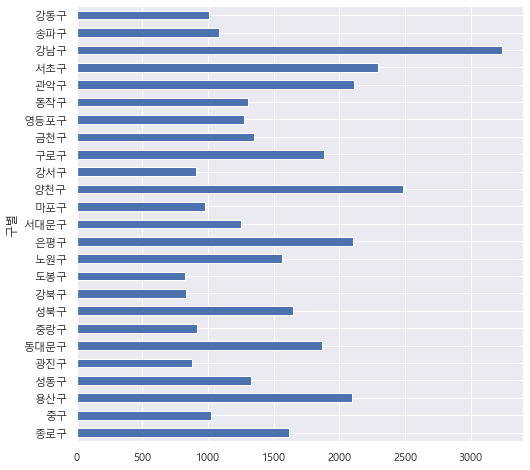

In [116]:
data_result["소계"].plot(kind="barh", figsize=(8,8), grid=True)

### 3-3-2. 인구 대비 CCTV 개수 확인

<AxesSubplot:ylabel='구별'>

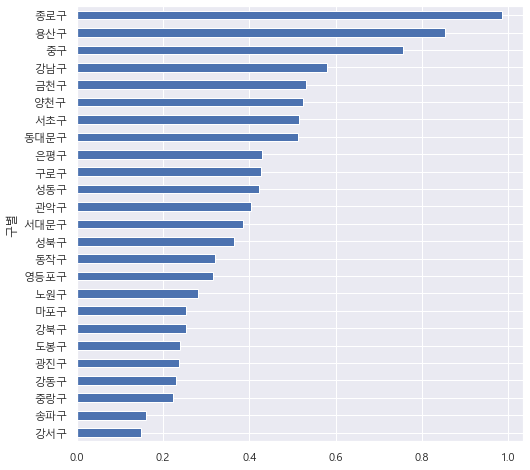

In [122]:
##### CCTV비율 파생변수 추가
data_result["CCTV비율"] = (data_result["소계"]/data_result["인구수"]) * 100
data_result["CCTV비율"].sort_values().plot(kind="barh", figsize=(8,8), grid=True)

### 3-3-3. CCTV개수와 인구 수가 서로 관계가 있는지 여부 확인

Text(0, 0.5, '소계')

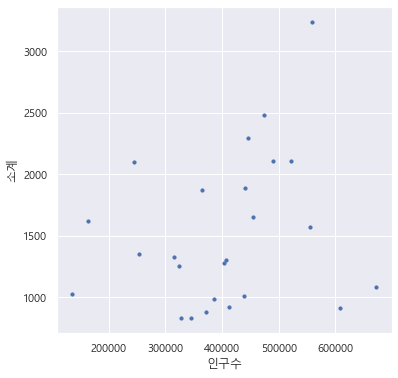

In [146]:
# sns.scatterplot(x = data_result["인구수"], y = data_result["소계"])
plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"], data_result["소계"], s=10) # s = 점의 size
plt.xlabel("인구수")
plt.ylabel("소계")
# plt.grid() # 실행시 그리드 제거(온오프)

In [145]:
?plt.scatter

In [155]:
##### 회귀선 : y = ax + b

fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1) # 직선, 1차 방정식이기 때문에 1
print(fp1)

f1 = np.poly1d(fp1)
print(f1)

[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


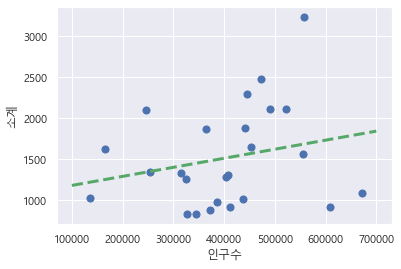

In [162]:
fx = np.linspace(100000, 700000, 100) # 인구수가 10만부터 70만으로 되어 있음

plt.scatter(data_result["인구수"], data_result["소계"], s=50) # s = 점의 size

plt.xlabel("인구수")
plt.ylabel("소계")

# plt.plot(fx, fp1[0]*fx +fp1[1])
plt.plot(fx, f1(fx), lw=3, color="g", ls="dashed") # lw = line width, ls = line style

<AxesSubplot:xlabel='인구수', ylabel='소계'>

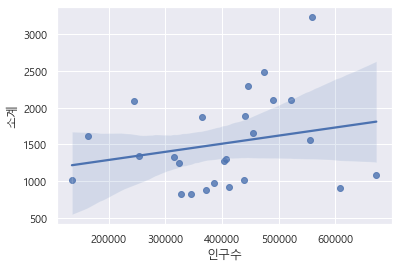

In [159]:
##### sns이용

sns.regplot(x="인구수", y="소계", data=data_result)

In [167]:
##### 각 데이터의 오차를 구해서 "오차"라는 파생변수 추가

# 소계는 y값이고 인구수를 1차 방정식(직선)에 대입하면 y값이 나옴
data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구수"]))
data_result.sort_values("오차")

,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,
금천구,253344,234238,19106,34640,7.541525,13.673109,1348,100.000000,0.532083,0.413852
성북구,453902,442226,11676,66896,2.572361,14.737983,1651,63.627354,0.363735,81.105210
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822,0.421871,89.006188
노원구,555803,551902,3901,75081,0.701867,13.508563,1566,188.929889,0.281755,116.426472
서대문구,324871,312311,12560,49645,3.866150,15.281450,1254,48.578199,0.385999,173.402808
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758,0.756998,194.877278
동작구,406715,394353,12362,57711,3.039475,14.189543,1302,139.338235,0.320126,215.785071
영등포구,403988,369128,34860,54704,8.628969,13.540996,1277,157.979798,0.316098,237.773581
구로구,440396,408369,32027,59838,7.272319,13.587317,1884,64.973730,0.427797,329.020205


In [168]:
df_sort = data_result.sort_values(by="오차", ascending=False)
df_sort

,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,150.619195,0.580427,1553.296412
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,34.671731,0.524639,890.918761
강서구,608361,601696,6665,77381,1.095567,12.719586,911,134.793814,0.149747,829.467513
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,0.854077,756.346747
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,63.371266,0.515990,736.754790
송파구,671994,665282,6712,77978,0.998818,11.603973,1081,104.347826,0.160865,729.738939
도봉구,345041,342861,2180,54293,0.631809,15.735231,825,246.638655,0.239102,624.677016
중랑구,411552,406868,4684,59992,1.138131,14.577016,916,79.960707,0.222572,607.126685
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,0.236230,601.085154


C:\Users\thdwl\AppData\Local\Temp\ipykernel_16228\2942973222.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


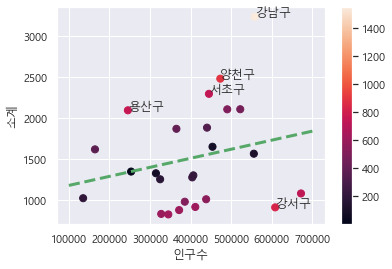

In [180]:
fx = np.linspace(100000, 700000, 100)

plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"]) # 선과의 거리에 따라 다른 색으로 표시
plt.plot(fx, f1(fx), lw=3, color="g", ls="dashed")

plt.xlabel("인구수")
plt.ylabel("소계")
plt.colorbar()

for n in range(5):
    plt.text(df_sort["인구수"][n], df_sort["소계"][n], df_sort.index[n])

In [181]:
df_sort.to_csv("data/seoul/csv_result.csv", encoding="utf-8")